In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [13]:
df = pd.read_csv("/Users/rajashree/Downloads/online_shoppers_intention.csv")

In [14]:
data = df.copy

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [16]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<Axes: >

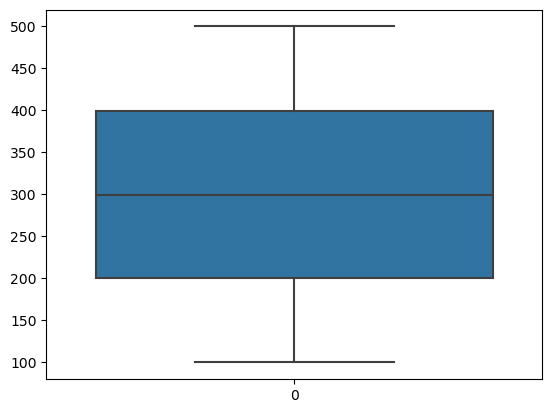

In [8]:
sns.boxplot(df["Inventory_Level"])

In [10]:
df.isna().sum()

Timestamp                    0
Asset_ID                     0
Latitude                     0
Longitude                    0
Inventory_Level              0
Shipment_Status              0
Temperature                  0
Humidity                     0
Traffic_Status               0
Waiting_Time                 0
User_Transaction_Amount      0
User_Purchase_Frequency      0
Logistics_Delay_Reason     263
Asset_Utilization            0
Demand_Forecast              0
Logistics_Delay              0
dtype: int64

In [11]:
df['Logistics_Delay_Reason'].fillna(df['Logistics_Delay_Reason'].mode()[0], inplace=True)

In [12]:
df['Logistics_Delay_Reason'].value_counts()

Logistics_Delay_Reason
Weather               530
Traffic               236
Mechanical Failure    234
Name: count, dtype: int64

In [17]:
categorical_cols = ['Month', 'VisitorType', 'Weekend', 'Revenue']

In [18]:
label_encoders = {}

In [21]:
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])  # Target

In [22]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


<Figure size 1000x600 with 0 Axes>

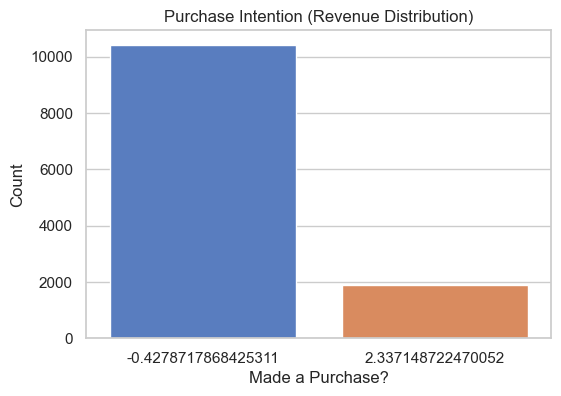

In [50]:

# Set plot style
sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(10, 6))

# 1. Revenue distribution (Target variable)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Revenue')
plt.title('Purchase Intention (Revenue Distribution)')
plt.xlabel('Made a Purchase?')
plt.ylabel('Count')
plt.show()




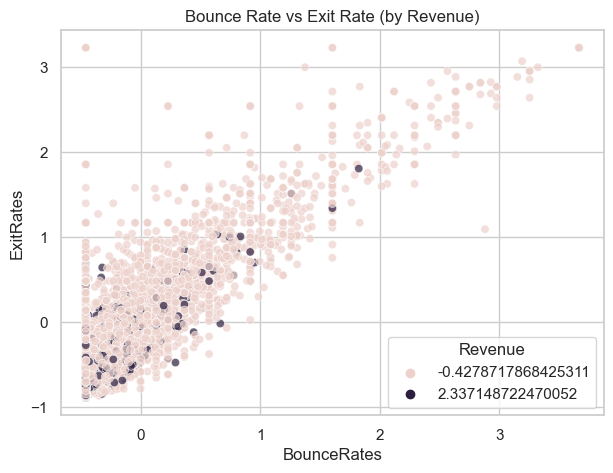

In [51]:
# 2. Bounce Rate vs Exit Rate colored by Revenue
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='BounceRates', y='ExitRates', hue='Revenue', alpha=0.7)
plt.title('Bounce Rate vs Exit Rate (by Revenue)')
plt.show()



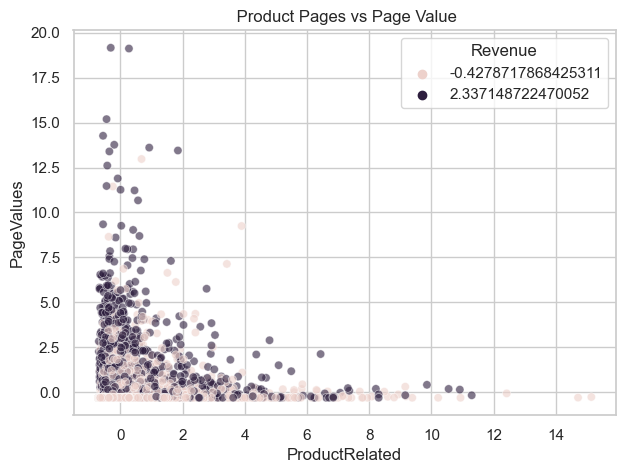

In [53]:
# 3. ProductRelated vs PageValues colored by Revenue
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='ProductRelated', y='PageValues', hue='Revenue', alpha=0.6)
plt.title(' Product Pages vs Page Value')
plt.show()



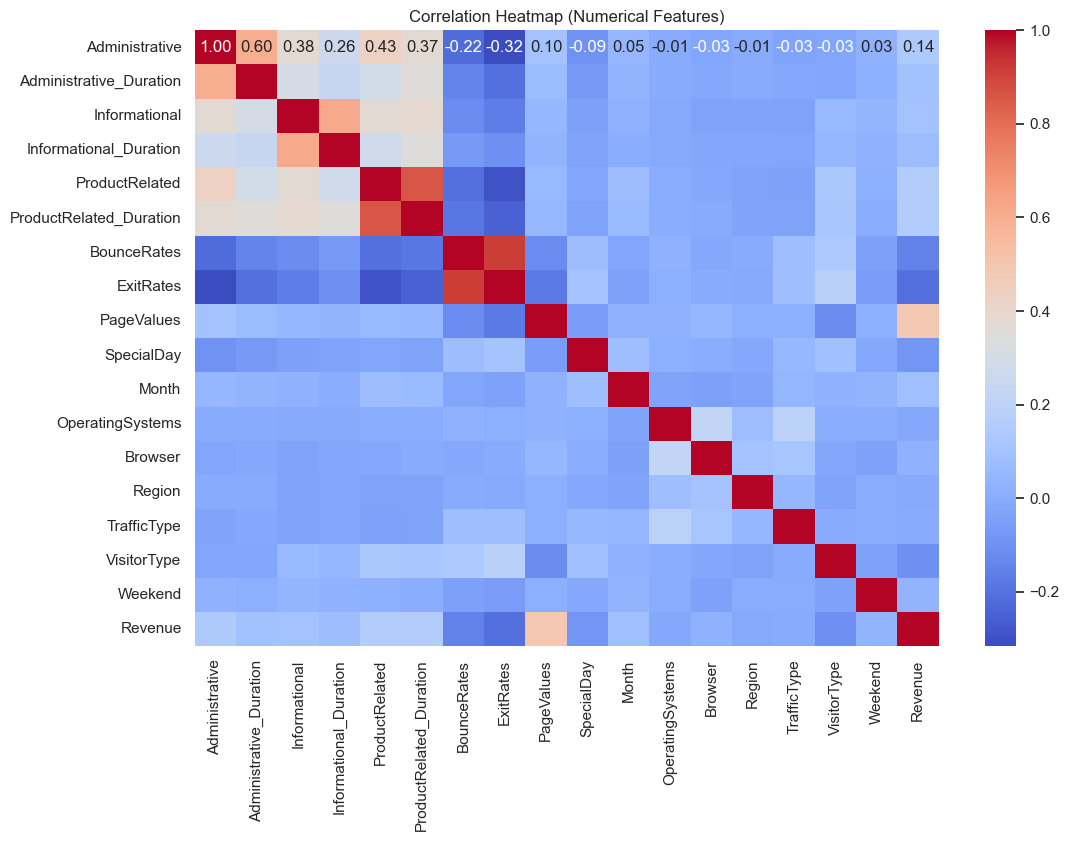

In [56]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Features)')

plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 0.6581483146852561
Mean Absolute Error (MAE): 0.5046870443997304
R² Score: 0.17279600587244515
